E:\DL Projects\DL\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 207ms/step - accuracy: 0.7777 - loss: 0.4603 - val_accuracy: 0.8490 - val_loss: 0.3583
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 208ms/step - accuracy: 0.8881 - loss: 0.2830 - val_accuracy: 0.8586 - val_loss: 0.3992
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 215ms/step - accuracy: 0.9184 - loss: 0.2129 - val_accuracy: 0.8598 - val_loss: 0.3396
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 215ms/step - accuracy: 0.9450 - loss: 0.1493 - val_accuracy: 0.8626 - val_loss: 0.3571
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 221ms/step - accuracy: 0.9610 - loss: 0.1123 - val_accuracy: 0.8636 - val_loss: 0.4740
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8520 - loss: 0.5089
Test accuracy (LSTM): 85.196
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 203ms/step - accuracy: 0.7404 - loss: 0.4976 - val_accuracy: 0.8326 - val_loss: 0.3748
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 59s 188ms/step - accuracy: 0.8931 - loss: 0.2695 - val_accuracy: 0.8470 - v

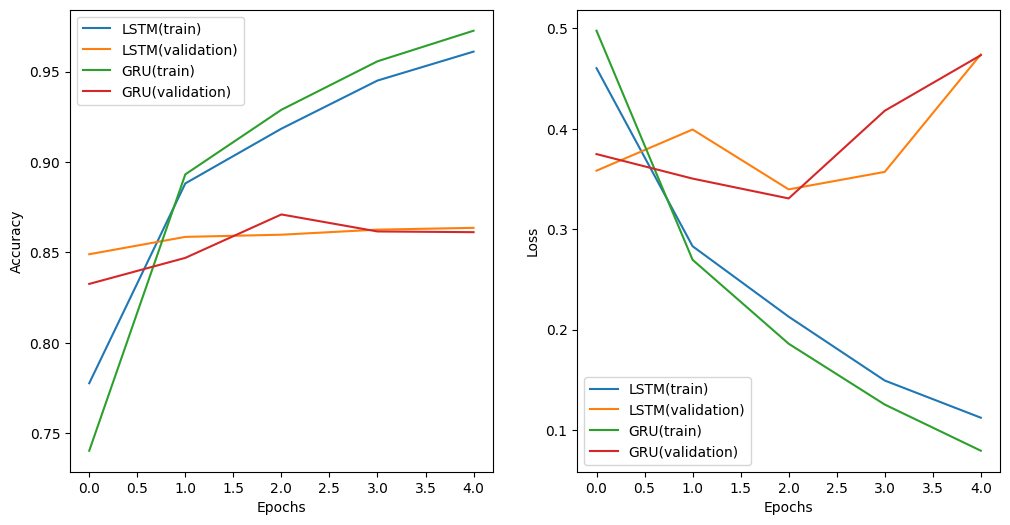

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU
import matplotlib.pyplot as plt

# Hyperparameters
num_words = 10000
max_length = 200

# Load and preprocess data
(xtr, ytr), (xte, yte) = imdb.load_data(num_words=num_words)
xtr = pad_sequences(xtr, maxlen=max_length)
xte = pad_sequences(xte, maxlen=max_length)

# LSTM model
l_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
l_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
l_history = l_model.fit(xtr, ytr, validation_split=0.2, epochs=5, batch_size=64)
loss, acc = l_model.evaluate(xte, yte)
print("Test accuracy (LSTM):", round(acc * 100, 4))

# GRU model
g_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    GRU(128),
    Dense(1, activation='sigmoid')
])
g_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g_history = g_model.fit(xtr, ytr, validation_split=0.2, epochs=5, batch_size=64)
loss, acc = g_model.evaluate(xte, yte)
print("Test accuracy (GRU):", round(acc * 100, 4))

# Plotting results
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(l_history.history['accuracy'], label='LSTM(train)')
plt.plot(l_history.history['val_accuracy'], label='LSTM(validation)')
plt.plot(g_history.history['accuracy'], label='GRU(train)')
plt.plot(g_history.history['val_accuracy'], label='GRU(validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(l_history.history['loss'], label='LSTM(train)')
plt.plot(l_history.history['val_loss'], label='LSTM(validation)')
plt.plot(g_history.history['loss'], label='GRU(train)')
plt.plot(g_history.history['val_loss'], label='GRU(validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()